# Name That Chart Data Analysis

This notebook is supplemental material of the submitted article "*What do you call this kind of chart?* Building an Information Visualization Taxonomy Using Collaborative Crowdsourcing" at CHI 2018

In [1]:
import numpy as np
import pandas as pd # package for working with data frames in python
import seaborn as sns # package for visualization (more on seaborn later)

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set(color_codes=True)

# Stats to be included in the LaTeX article
stats = {}

# Log Events Analysis

TODO

* Allow to filter by time period 
* Remove certain users/IPs we are not interested in


In [2]:
# Retrieving experiment data from the crowdsourcing web app
# Data URL https://namethatchart.herokuapp.com/db2csv
# http://namethatchart.herokuapp.com/datcsv.csv
df = pd.read_csv('data/data-22-08-2017.csv', sep=',') #  index_col=[0]

# In case we want to retrieve latest / live data
# url = "https://namethatchart.herokuapp.com/datcsv.csv"
# c=pd.read_csv(url)

In [3]:
df

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,textual,textual_8,22,1501075105,2017-07-26 15:18:25.580,submitted,9,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,textual,textual_11,22,1501075131,2017-07-26 15:18:51.656,submitted,9,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,textual,textual_14,22,1501075162,2017-07-26 15:19:22.597,submitted,10,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


In [4]:
stats["nbTotalLogsEntries"] = len(df)
print("Total number of log entries that we recorded: %s" % stats["nbTotalLogsEntries"])

Total number of log entries that we recorded: 6640


In [5]:
# Log entries attributes
df.columns

Index(['task', 'task_id', 'iduser', 'timestamp', 'date', 'event', 'idtype',
       'label', 'idimg', 'imagepath'],
      dtype='object')

In [6]:
# Distribution by log entry user events
df['event'].value_counts()[:10]

visible        3624
swipe          1229
page loaded    1099
skip            293
chosen          202
submitted       193
Name: event, dtype: int64

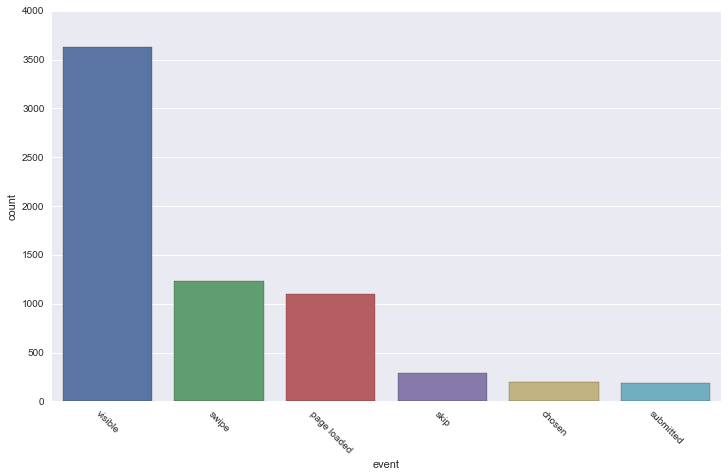

In [7]:
# TODO: chart that shows the events distribution
f, ax = plt.subplots(figsize=(12, 7))
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='event', data=df, order=df.event.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/event-distribution.png")

In [8]:
df['task'].value_counts()[:10]

selection    3151
swipe        3059
reverse       237
textual       193
Name: task, dtype: int64

In [9]:
df['label'].value_counts()[:10]

bubble chart    1087
map              860
flow chart       797
bar chart        766
pie chart        658
tree diagram     644
table            641
scatter plot     511
area chart       303
line chart       168
Name: label, dtype: int64

In [10]:
stats["nbTotalLabels"] = len(df['label'].value_counts())
print("Number or unique labels: %s" % stats["nbTotalLabels"])

Number or unique labels: 46


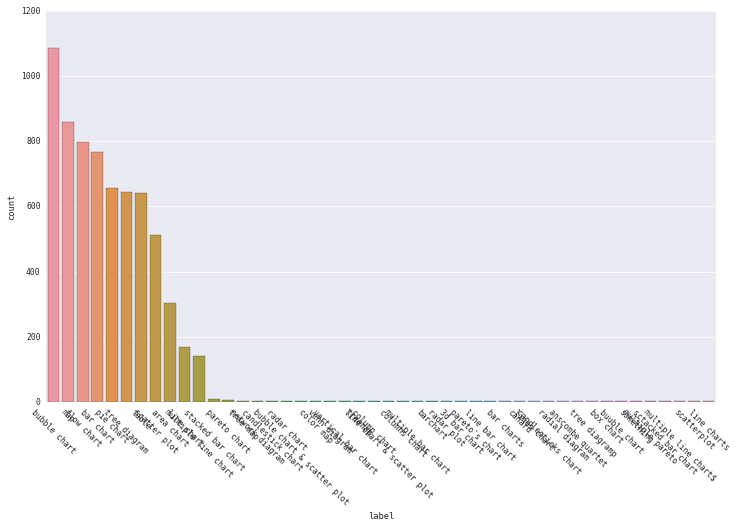

In [11]:
# Distribution by image label
f, ax = plt.subplots(figsize=(12, 7))
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='label', data=df, order=df.label.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
# fig.set_size_inches(11.7, 8.27)
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/categories-distribution.png")

In [12]:
# df.label.value_counts()[:10]
df_label_top10 = df.groupby("label").filter(lambda x: len(x) > 10)
df_label_top10

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...
10,textual,textual_16,22,1501075176,2017-07-26 15:19:36.075,submitted,7,bubble chart,49,https://s3.eu-central-1.amazonaws.com/namethat...
12,textual,textual_20,22,1501075220,2017-07-26 15:20:20.193,submitted,12,flow chart,120,https://s3.eu-central-1.amazonaws.com/namethat...
13,textual,textual_21,22,1501075229,2017-07-26 15:20:29.725,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...


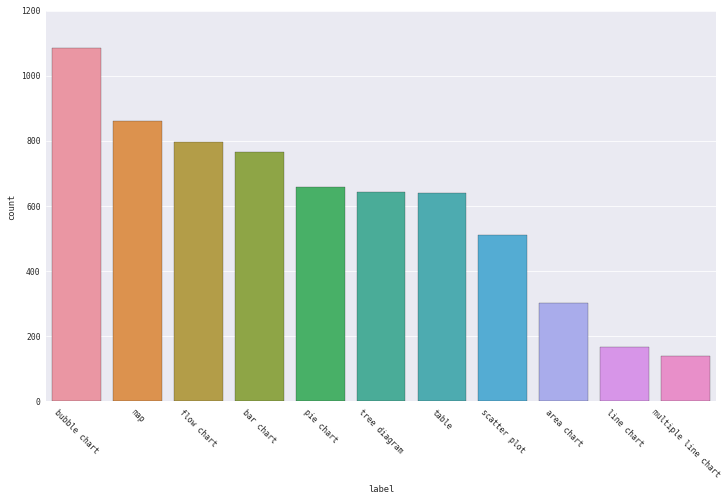

In [13]:
# Top-10 Distribution by ImageID
f, ax = plt.subplots(figsize=(12, 7))
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='label', data=df_label_top10, order=df_label_top10.label.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
# fig.set_size_inches(11.7, 8.27)
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/categories-distribution-top10.png")

In [14]:
# TODO
# higher quality/resolution

In [15]:
df_label_top10.label.value_counts()

bubble chart           1087
map                     860
flow chart              797
bar chart               766
pie chart               658
tree diagram            644
table                   641
scatter plot            511
area chart              303
line chart              168
multiple line chart     140
Name: label, dtype: int64

In [16]:
stats["nbTotalCategories"] = len(df_label_top10.label.value_counts())
print("Number or unique categories: %s" % stats["nbTotalCategories"])

Number or unique categories: 11


### Raw Users Analysis

In [17]:
df['iduser'].value_counts()[:10]

22    6441
32      39
26      27
33      23
41      17
24      15
23      15
28      10
42       9
25       8
Name: iduser, dtype: int64

In [18]:
stats["nbUniqueUsersRaw"] = len(df['iduser'].value_counts())
print("Number of unique visitors: %s" % stats["nbUniqueUsersRaw"])
print("Double checking of unique visitors: %s" % len(df['iduser'].unique()))

Number of unique visitors: 20
Double checking of unique visitors: 20


### Clean Users Analysis

We discarded the following events

* Users with less than 2 answers
* 

TODO 

* Number of answers / logs per participants (show distribution)
* Longest series of answers
* Participants with most accuracy
* Ones that are similar / agree together
* Ones that are not consensual at all
* Outliers
* Cluster by participants similarities

In [19]:
# Discard users that do not provide enough results
df_users_clean = df.groupby("iduser").filter(lambda x: len(x) > 10)
stats["nbUniqueUsers"] = len(df_users_clean.groupby("iduser"))
df_users_clean

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,textual,textual_8,22,1501075105,2017-07-26 15:18:25.580,submitted,9,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,textual,textual_11,22,1501075131,2017-07-26 15:18:51.656,submitted,9,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,textual,textual_14,22,1501075162,2017-07-26 15:19:22.597,submitted,10,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


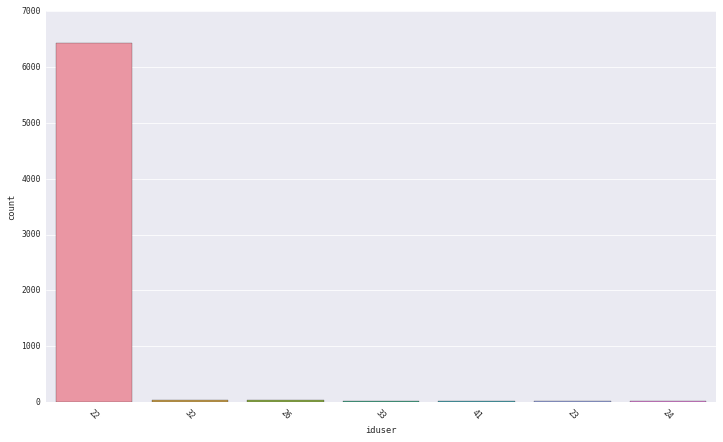

In [20]:
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 7))
sns_plot = sns.countplot(x='iduser', data=df_users_clean, order=df_users_clean.iduser.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/users-distribution-clean.png")

### Average Session Length

TODO

* Scatterplot that shows the number of hits per session length

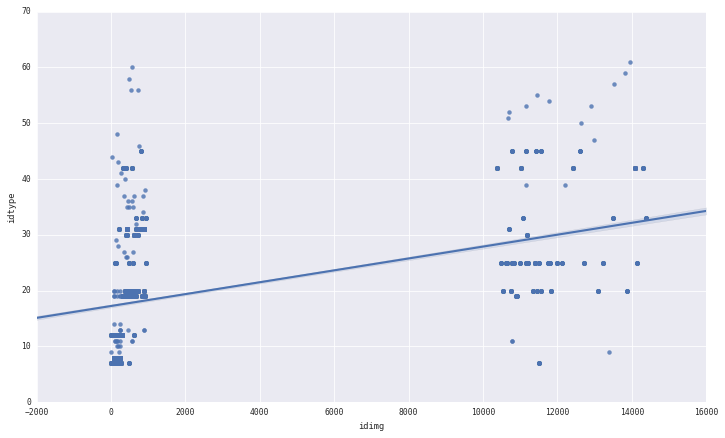

In [21]:
f, ax = plt.subplots(figsize=(12, 7))
sns.regplot(x="idimg", y="idtype", data=df_users_clean)
show()

### Scatterplot Length by Response Time

TODO

* Unique user ids dict
* For each new task
  * Record first timestamp
  * Record second timestamp
  * Calculate deta
  * Add to user ids

## Image Collection Analysis

TODO

* [X] Load all the images
* [ ] Images by categories (if known) e.g. web, dataset, from extension, etc.
* [ ] Utiliser URL http://namethatchart.herokuapp.com/image2json



In [22]:
df_images = pd.read_json('data/images-26-08-2017.json') #  index_col=[0]
df_images_subset = df_images[:10][:10]
df_images_subset

,Type,id,path
0,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


In [23]:
df_images

,Type,id,path
0,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


In [24]:
stats["nbTotalImages"] = len(df_images)
print("Total number of images in dataset: %s" % stats["nbTotalImages"])

Total number of images in dataset: 4856


### Image links similarities

* Look at the connection between images
* Stronger connection if belong to the same category


### Number of vote per image?

TODO

* Base on events
* Distribution of vote types per image
* Discarded images
* Time spent by image
* 


## Matrix Chart / Plot / Diagrams

TODO

1. Go over all the image names
2. Extract the canonical form (bar, line, ..) or discard the name
3. Identify the POSTFIX (chart, plot, diagram, empty)
4. Calculate the probability (normalize)
5. Shape the data to build the heatamp

In [25]:
# Various configs
list_canon = ["bar", "line", "area", "dot", "scatter", "pie", "column", "circle", "tree", "empty", "other"]
list_postfix = ["chart", "plot", "diagram", "graph", "empty", "other"]
list_prefix = ["vertical", "horizontal", "radial", "stacked", "double", "empty", "other"]

In [26]:
# TODO
# Count Empty categories
# Other categories

dict_charts = {}

for l in list_canon:
    dict_charts[l] = {"total": 0}
    
    for p in list_postfix:
        dict_charts[l][p] = 0

for i in df_images.iterrows():
    name = i[1][0]
    
    # For each chart type
    for c in list_canon:
        already_postfix = False
        # Is it the current chart?
        if type(name) is not float and c in name:
  
        
            for p in list_postfix:
                if p in name:
                    already_postfix = True
                    dict_charts[c][p] += 1
                    dict_charts[c]["total"] += 1

            if name.strip() == c:
                dict_charts[c]["empty"] += 1
            # TODO: other category
            # elif not already_postfix:
            #    dict_charts[c]["other"] += 1

print(dict_charts)
    # Increment counter for the chart
    #dict_charts["area"]["total"] += 1

{'other': {'graph': 0, 'other': 0, 'plot': 0, 'total': 0, 'diagram': 0, 'empty': 0, 'chart': 0}, 'scatter': {'graph': 0, 'other': 0, 'plot': 14, 'total': 16, 'diagram': 0, 'empty': 0, 'chart': 2}, 'line': {'graph': 0, 'other': 0, 'plot': 1, 'total': 21, 'diagram': 0, 'empty': 0, 'chart': 20}, 'tree': {'graph': 0, 'other': 0, 'plot': 0, 'total': 7, 'diagram': 7, 'empty': 0, 'chart': 0}, 'pie': {'graph': 0, 'other': 0, 'plot': 0, 'total': 11, 'diagram': 0, 'empty': 0, 'chart': 11}, 'column': {'graph': 0, 'other': 0, 'plot': 0, 'total': 3, 'diagram': 0, 'empty': 0, 'chart': 3}, 'bar': {'graph': 0, 'other': 0, 'plot': 0, 'total': 42, 'diagram': 0, 'empty': 0, 'chart': 42}, 'empty': {'graph': 0, 'other': 0, 'plot': 0, 'total': 0, 'diagram': 0, 'empty': 0, 'chart': 0}, 'area': {'graph': 0, 'other': 0, 'plot': 0, 'total': 6, 'diagram': 0, 'empty': 0, 'chart': 6}, 'circle': {'graph': 0, 'other': 0, 'plot': 0, 'total': 0, 'diagram': 0, 'empty': 0, 'chart': 0}, 'dot': {'graph': 0, 'other': 0, 'p

In [27]:
np_array = pd.DataFrame(dict_charts).T.fillna(0)
np_array

,chart,diagram,empty,graph,other,plot,total
area,6,0,0,0,0,0,6
bar,42,0,0,0,0,0,42
circle,0,0,0,0,0,0,0
column,3,0,0,0,0,0,3
dot,0,0,0,0,0,0,0
empty,0,0,0,0,0,0,0
line,20,0,0,0,0,1,21
other,0,0,0,0,0,0,0
pie,11,0,0,0,0,0,11
scatter,2,0,0,0,0,14,16


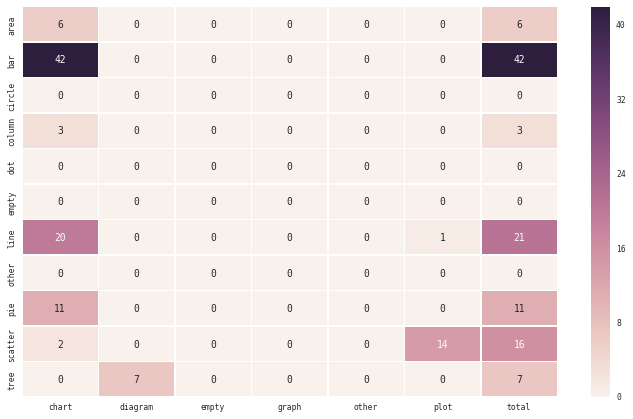

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(np_array, annot=True, fmt="d", linewidths=.5, ax=ax)
show()

In [29]:
df_images

,Type,id,path
0,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


# String similarities

Levenshtein's distance https://en.wikipedia.org/wiki/Levenshtein_distance

Levenshtein similarity measure (as defined in https://hal.inria.fr/hal-01376597/document)

https://stackoverflow.com/questions/6690739/fuzzy-string-comparison-in-python-confused-with-which-library-to-use

In [30]:
# pip install python-Levenshtein
import Levenshtein
Levenshtein.ratio('Bar chart', 'barchart')

0.8235294117647058

In [31]:
Levenshtein.ratio('Bar chart', 'bar chart')

0.8888888888888888

In [32]:
Levenshtein.ratio('Bar chart', 'bar graph')

0.4444444444444444

In [33]:
Levenshtein.ratio('Bar chart', 'line chart')

0.631578947368421

# Building a Graph of Similiarities


TODO

* Load images as graph node
  *  Only images that have a category!
* Node size should vary based on some attribute
* Link size also both visually and in terms of strenght
* Make the layout deterministic to render the same each time?
* Add images in nodes circles (SVG background)
* Hover shows the full chart
*

* Create a matrix that will be the foundation for the taxonomy graph
* 

* Graph chart layout -> Plotly?
* Sankey Diagram https://github.com/ricklupton/ipysankeywidget


In [34]:
import json

nodes_list = []
links_list = []
json_data = {"nodes":nodes_list, "links":links_list}

In [35]:
for i in df_images[:100].iterrows():
    nodes_list.append({"id": i[1][1], "group": i[1][0]})

In [36]:
# Fake data
links_list.append({"source": "143", "target": "238", "value": 1})

In [37]:
json_dump = json.dumps(json_data, indent=1, sort_keys=True)
print(json_dump)

{
 "links": [
  {
   "source": "143",
   "target": "238",
   "value": 1
  }
 ],
 "nodes": [
  {
   "group": "bubble chart",
   "id": 143
  },
  {
   "group": "tree diagram",
   "id": 238
  },
  {
   "group": "candlestick chart",
   "id": 7
  },
  {
   "group": "tree diagram",
   "id": 81
  },
  {
   "group": "tree diagram",
   "id": 217
  },
  {
   "group": "candlestick chart",
   "id": 222
  },
  {
   "group": "bubble chart",
   "id": 146
  },
  {
   "group": "bubble chart",
   "id": 48
  },
  {
   "group": "network diagram",
   "id": 191
  },
  {
   "group": "tree diagram",
   "id": 78
  },
  {
   "group": "bubble chart",
   "id": 49
  },
  {
   "group": "stacked bar chart",
   "id": 151
  },
  {
   "group": "flow chart",
   "id": 120
  },
  {
   "group": "flow chart",
   "id": 54
  },
  {
   "group": "flow chart",
   "id": 268
  },
  {
   "group": "pareto chart",
   "id": 248
  },
  {
   "group": "bubble chart & scatter plot",
   "id": 84
  },
  {
   "group": "flow chart",
   "id": 

In [38]:
graph_file = '/Users/rvuillemot/Dev/NameThatChart/graph/data.json'
json_out = open(graph_file, 'w')
json_out.write(json_dump)
json_out.close()

In [64]:
stats["nbNodesGraph"] = len(nodes_list)
stats["nbNodesGraph"]
stats["nbEdgesGraph"] = len(links_list)
stats["nbEdgesGraph"]

1

# Analyzing the graph of similarities

TODO

* Like on https://tobias.isenberg.cc/personal/papers/Isenberg_2017_VST.pdf

Per cluster, visualize as a scatterplot: 

* Density
* Distance
* Size: frequence
* Show mean values as axis
* Encoding the `marker` with size/frequency

https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html

https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.classes.function.density.html

* VERY GOOD Networkx tutorial https://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf

In [65]:
# pip3 install networkx
import networkx as nx
g = nx.Graph() # empty graph
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2)

In [66]:
import math
g.add_node(math.cos)

In [67]:
print(nx.shortest_path(g, 'b', 'd'))

['b', 'c', 'd']


In [68]:
print(g.nodes())

['b', 'a', <built-in function cos>, 'c', 'd']


In [69]:
print(g.edges())

[('b', 'a'), ('b', 'c'), ('a', 'c'), ('c', 'd')]


In [70]:
# Density https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.classes.function.density.html


In [71]:
nx.density(g)

0.4

In [72]:
clustering = list(nx.clustering(g).values())

In [73]:
degree_centrality = list(nx.degree_centrality(g).values())

In [74]:
d = {'clustering': clustering, 'degree_centrality': degree_centrality}

In [75]:
df_graph = pd.DataFrame(d)

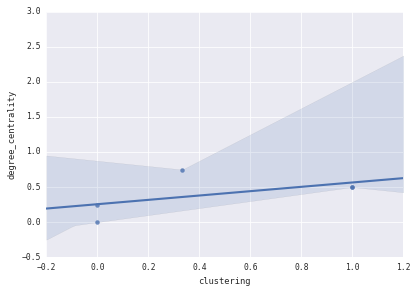

In [76]:
sns.regplot(x="clustering", y="degree_centrality", data=df_graph)
show()

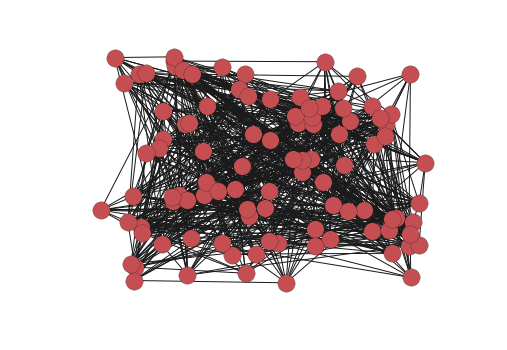

In [77]:
g = nx.erdos_renyi_graph(100,0.15)
nx.draw_random(g)
show()

In [78]:
 plt.savefig('graph.png')

# Empirical Study of Taxonomies

* Original spreadsheet https://docs.google.com/spreadsheets/d/1pObBSCB38wGJmrh8lxl1agYS94ZTggemnfOrM-v_YgI/edit?usp=sharing


In [79]:
df_taxonomy = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   '1pObBSCB38wGJmrh8lxl1agYS94ZTggemnfOrM-v_YgI' +
                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
                   index_col=0
                  )
df_taxonomy.head(100)

,URL,origin,nb_vis_types,nb_vis_levels,nb_levels,nb_templates
Dataviz for all,https://www.datavizforall.org/chart/,tutorial,NaN,NaN,NaN,NaN
Protovis,http://mbostock.github.io/protovis/ex/,toolkit,NaN,NaN,NaN,NaN
A periodic table,http://www.visual-literacy.org/periodic_table/...,tutorial,NaN,NaN,NaN,NaN
Highcharts,https://www.highcharts.com/demo,toolkit,NaN,NaN,NaN,NaN
Vega,https://vega.github.io/vega/examples/,toolkit,NaN,NaN,NaN,NaN
Drawing with numbers,http://drawingwithnumbers.artisart.org/wiki/ta...,blog,NaN,NaN,NaN,NaN
Tableau Gallery,https://public.tableau.com/en-us/s/gallery,software,NaN,NaN,NaN,NaN
The Chartmaker,http://chartmaker.visualisingdata.com/,blog,NaN,NaN,NaN,NaN
The Atlas of Knowledge,https://pdfs.semanticscholar.org/530c/feab7f44...,book,NaN,NaN,NaN,NaN
Graph selection matrix,https://www.perceptualedge.com/articles/misc/G...,tutorial,NaN,NaN,NaN,NaN


In [80]:
stats["nbTaxonomies"] = df_taxonomy['origin'].count()
stats["nbTaxonomies"]

30

In [81]:
stats["nbTaxonomiesTutorial"] = len(df_taxonomy[df_taxonomy.origin == 'tutorial'])
stats["nbTaxonomiesTutorial"]

8

In [82]:
stats["nbTaxonomiesSoftware"] = len(df_taxonomy[df_taxonomy.origin == 'software'])
stats["nbTaxonomiesSoftware"]

8

In [83]:
df_taxonomy_types_no_na = df_taxonomy['nb_vis_types'].dropna()
df_taxonomy_types_no_na

LiveGAP charts    9.0
NaN               5.0
Name: nb_vis_types, dtype: float64

In [84]:
stats["avgChartsTaxonomies"] = sum(df_taxonomy_types_no_na) / float(len(df_taxonomy_types_no_na))
stats["avgChartsTaxonomies"]

7.0

## Stats writing

e.g.:

```
\def \totalTaxonomies {$12$~}
\def \totalCategories {$5$~}
```

In [85]:
# stats = {}

In [86]:
stats_file = "/Users/rvuillemot/Dropbox/paper-2017-crowdvis/stats.inc"
stats_content = "" #"\def \\totalTaxonomies {15~}\n"

In [87]:
for s in stats:
    print(s, stats[s])
    stats_content += "\def \\%s {%s}\n" % (s, stats[s])

nbEdgesGraph 1
nbTotalLogsEntries 6640
nbUniqueUsers 7
nbTaxonomiesTutorial 8
nbTaxonomiesSoftware 8
avgChartsTaxonomies 7.0
nbTotalCategories 11
nbNodesGraph 100
nbTotalImages 4856
nbTotalLabels 46
nbUniqueUsersRaw 20
nbTaxonomies 30


In [88]:
text_file = open(stats_file, "w")
text_file.write(stats_content)
text_file.close()